In [3]:
import csv
import json
import pandas as pd
import nltk
import numpy as np
import re
import pickle
import joblib
import matplotlib.pyplot as plt

Note: Data originally stored on AWS but I took it down.

In [91]:
messages1 = pd.read_json('/Users/karaliu 1/Downloads/Data/6_25_18_messages.json', lines=True)

In [92]:
messages2 = pd.read_json('/Users/karaliu 1/Downloads/Data/08_08_18_messages.json', lines=True)

In [94]:
messages3 = pd.read_json('/Users/karaliu 1/Downloads/Data/08_08_18_v2messages.json', lines=True)

In [ ]:
# del messages1
# del messages2
# del messages3

I could not join all the data but tested out clustering on the text messages alone.

In [100]:
messages_whole = pd.concat([messages1['message'],messages2['message'],messages3['message']])

In [101]:
text = []
button = []
for entry in messages_whole:
    try:
        text.append(entry['message']['text'])
    except:
        button.append(entry)

In [19]:
len(text)/len(button)

0.4898778072007074

In [102]:
text = pd.DataFrame(text,columns=['text'])

In [108]:
# Make a copy of the spam dataframe for the Google work
textual = text.copy()

textual['text'] = textual['text'].str.lower()
textual.drop_duplicates(inplace=True)

# Retrieve the document vectors based on google word vectors
textual_google_vecs = textual['text'].str.split().map(lambda x: get_doc_vec(x, google_model))

# Add to dataframe
textual['vecs'] = textual_google_vecs

# Drop the bad docs
textual = textual.dropna()

# Create a Numpy array of the document vectors
textual_np_vecs = np.zeros((len(textual), 300))
for i, vec in enumerate(textual['vecs']):
    textual_np_vecs[i, :] = vec
    
textual_google_data = pd.concat([textual.reset_index().text, pd.DataFrame(textual_np_vecs)], axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app


In [120]:
km=KMeans(n_clusters=10)
km.fit_transform(textual_np_vecs)

array([[ 1.59505079,  1.78617166,  1.57980625, ...,  0.72983425,
         1.6232685 ,  1.93782171],
       [ 3.22594967,  2.59214305,  2.54071933, ...,  3.20592344,
         2.52203567,  1.86220567],
       [ 2.67233058,  1.4209882 ,  1.65158496, ...,  2.4521508 ,
         2.14123976,  1.82934844],
       ..., 
       [ 2.17706588,  0.33539824,  0.77052431, ...,  1.960359  ,
         1.49194915,  1.18561828],
       [ 2.15266717,  1.12532148,  0.88862758, ...,  2.03833285,
         1.34386381,  1.55265716],
       [ 2.51996441,  1.49167217,  1.61479785, ...,  2.25205691,
         2.02808742,  1.91920361]])

There is a lot of noise in the clusters as there are 2.5mil messages from 3,000+ pages.

In [121]:
textual[km.predict(textual_np_vecs) == 2]

,text,vecs
133,"hi, i want get information about hair please.","[-0.0119629, -0.0201823, 0.0770671, 0.0, -0.08..."
202,good ad u,"[0.0623372, -0.0313314, -0.0175374, 0.040446, ..."
216,sir aapka no milega,"[0.00738525, 0.00262451, 0.144409, 0.168884, -..."
322,i have super active page,"[-0.00673828, 0.0212646, -0.00721436, 0.069531..."
325,"hi, i was wondering if you could share this vi...","[0.0196228, 0.0303802, 0.0447795, 0.169047, -0..."
327,thanks bless day to u,"[-0.0778809, 0.101501, -0.00238037, 0.142029, ..."
410,who are u,"[-0.0904948, 0.0389811, 0.0811768, 0.0131836, ..."
415,i do not speak english,"[-0.0347412, -0.103296, 0.0757568, 0.113883, -..."
419,i am urdo,"[-0.196289, -0.0429688, 0.0740967, 0.0888672, ..."
451,are you a camera coz each time i see you i smile,"[-0.01254, -0.0178112, 0.0704845, 0.172496, -0..."


## Cleaning and Joining the Tables

Messages, Followers, Pages

In [161]:
messes = pd.read_json('/Users/karaliu 1/Downloads/messages_only_messages.json', lines=True)

In [23]:
folls = pd.read_json('/Users/karaliu 1/Downloads/followers.json', lines=True)

In [24]:
page = pd.read_json('/Users/karaliu 1/Downloads/pages.json', lines=True)

In [26]:
messs = []
for i in messes['message']:
    try:
        messs.append(i['message']['text'])
    except:
        pass

In [27]:
messes['messages'] = messs

In [28]:
recip = []
for i in messes['message']:
    try:
        recip.append(i['recipient']['id'])
    except:
        pass

In [29]:
messes['recipient'] = recip

In [30]:
send = []
for i in messes['message']:
    try:
        send.append(i['sender']['id'])
    except:
        pass

In [31]:
messes['sender'] = send

In [32]:
messes.drop(columns=['_id', '__v', 'message','senderId'],inplace=True)

In [34]:
folls.drop(columns=['__v','attributes','_id','subscriptionType'],inplace=True)

In [36]:
folls = folls.set_index(['profile'])

In [37]:
folls = folls.filter(like="'gender':",axis=0)

In [38]:
folls = folls.filter(like="'timezone':",axis=0)

In [39]:
folls = folls.filter(like="'locale':",axis=0)

In [40]:
folls.reset_index(inplace=True)

In [41]:
gender = []
for i in folls['profile']:
    try:
        gender.append(i['gender'])
    except:
        pass

In [42]:
folls['gender'] = gender

In [43]:
timezone = []
for i in folls['profile']:
    try:
        timezone.append(i['timezone'])
    except:
        pass

In [44]:
folls['timezone'] = timezone

In [45]:
locale = []
for i in folls['profile']:
    try:
        locale.append(i['locale'])
    except:
        pass

In [46]:
folls['locale'] = locale

In [47]:
folls.drop(columns=['profile'],inplace=True)

In [48]:
folls['gender'].value_counts()

male      549776
female    532035
Name: gender, dtype: int64

In [50]:
page.drop(columns=['__v','_id','accessToken','administrators','botId','fetchedConversations','insufficientPermissions','insufficientPermissionsLastChecked','tags','whitelistedDomains'],inplace=True)

In [52]:
fans = []
for i in page['information']:
    try:
        fans.append(i['fanCount'])
    except:
        fans.append("NaN")

In [53]:
page['fans'] = fans

In [54]:
pagename = []
for i in page['information']:
    try:
        pagename.append(i['username'])
    except:
        pagename.append("NaN")

In [55]:
page['pagename'] = pagename

In [57]:
page.drop(columns=['information'],inplace=True)

In [58]:
for i in page['pagename']:
    if i == "NaN":
        page['pagename'] = page['name']

In [59]:
page.drop(columns=['name'],inplace=True)

In [89]:
page['pagename'].value_counts()

BFashion                                                                    12
E-Consejos                                                                   5
Dicas Online                                                                 5
Mulher Grávida                                                               5
Test                                                                         3
Junaid Al Habib                                                              3
Just Family Fun                                                              3
The Geordie Tipster                                                          2
miss KOREA BBQ                                                               2
Vushtrria                                                                    2
Nerds Board                                                                  2
Studio Narcis Drevinja                                                       2
Rrafshmir                                           

In [61]:
messes['recipient'] = messes['recipient'].astype('str')

In [62]:
messes['sender'] = messes['sender'].astype('str')

In [63]:
page['pageId'] = page['pageId'].astype('str')

In [64]:
page['userId'] = page['userId'].astype('str')

In [65]:
folls['pageId'] = folls['pageId'].astype('str')

In [66]:
folls['userId'] = folls['userId'].astype('str')

In [67]:
messes['rp_page'] = messes['recipient']
messes['ru_page'] = messes['recipient']
messes['sp_page'] = messes['sender']
messes['su_page'] = messes['sender']

In [68]:
page['rp_page'] = page['pageId']
page['ru_page'] = page['userId']
page['sp_page'] = page['pageId']
page['su_page'] = page['userId']

In [69]:
messes['rp_follow'] = messes['recipient']
messes['ru_follow'] = messes['recipient']
messes['sp_follow'] = messes['sender']
messes['su_follow'] = messes['sender']

In [70]:
folls['rp_follow'] = folls['pageId']
folls['ru_follow'] = folls['userId']
folls['sp_follow'] = folls['pageId']
folls['su_follow'] = folls['userId']

In [72]:
pd.merge(messes,page,how='inner',on=['rp_page']).shape

(1073809, 23)

In [73]:
pd.merge(messes,page,how='inner',on=['ru_page']).shape

(0, 23)

In [74]:
pd.merge(messes,page,how='inner',on=['sp_page']).shape

(0, 23)

In [75]:
pd.merge(messes,page,how='inner',on=['su_page']).shape

(0, 23)

In [76]:
pd.merge(messes,folls,how='inner',on=['rp_follow']).shape

(0, 23)

In [77]:
pd.merge(messes,folls,how='inner',on=['ru_follow']).shape

(235, 23)

In [78]:
pd.merge(messes,folls,how='inner',on=['sp_follow']).shape

(0, 23)

In [79]:
pd.merge(messes,folls,how='inner',on=['su_follow']).shape

(157787, 23)

In [80]:
messes.rename(index=str, columns={"date": "datemess"},inplace=True)

In [81]:
page.rename(index=str, columns={"date": "datepage"},inplace=True)

In [82]:
messpage = pd.merge(messes,page,how='inner',on=['rp_page'])

In [83]:
df_f = pd.merge(messpage,folls,how='inner',on=['su_follow'])

Only 157,822 successfuly merged messages.

In [84]:
df_f.shape

(157822, 33)

In [85]:
messes.shape

(1073942, 13)

In [87]:
df_final = df_f.drop(columns=['pageId_x','recipient','sender','ru_page_x','sp_page_x','su_page_x','rp_follow_x',
               'pageId','userId_y','rp_follow_y','ru_follow_y','sp_follow_y','ru_follow_x','sp_follow_x',
                   'pageId_y','userId_x','ru_page_y','sp_page_y','su_page_y'])

In [77]:
with open('mergedmess.pkl','wb') as file:
    pickle.dump(df_final,file)
    
with open('mergedmess.pkl','rb') as file:
    mergedmess = pickle.load(file)

In [96]:
del folls
del messes
del page
del df_final

In [99]:
with open('mergedmess.pkl','rb') as file:
    mergedmess = pickle.load(file)

In [19]:
mergedmess.shape

(157822, 14)

In [186]:
mergedmess.drop_duplicates(inplace=True)

~~~

## Vectorization

In [104]:
import os
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
google_vec_file = '~/Downloads/GoogleNews-vectors-negative300.bin'
google_model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

In [159]:
def get_doc_vec(words, model):
    good_words = []
    for word in words:
        try:
            if model.wv[word] is not None:
                good_words.append(word)
        except:
            continue
    if len(good_words) == 0:
        return None
    return model.wv[good_words].mean(axis=0)

In [163]:
#messed = mergedmess.copy()

messed['messages'] = messed['messages'].str.lower()

#messed.drop_duplicates(inplace=True)

messed_google_vecs = messed['messages'].str.split().map(lambda x: get_doc_vec(x, google_model))

messed['vecs'] = messed_google_vecs

messed = messed.dropna()

messed_np_vecs = np.zeros((len(messed), 300))
for i, vec in enumerate(messed['vecs']):
    messed_np_vecs[i, :] = vec
    
messed_google_data = pd.concat([messed.reset_index().messages, pd.DataFrame(messed_np_vecs)], axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [164]:
messed_google_data.shape

(129304, 301)

## Modelling

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [420]:
sample = pd.DataFrame(messed_np_vecs)
sampled = sample.sample(n=8000)
sampled.shape

(8000, 300)

In [421]:
from sklearn.metrics import silhouette_score

SSEs = []
Sil_coefs = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(sampled.values)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(sampled.values, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

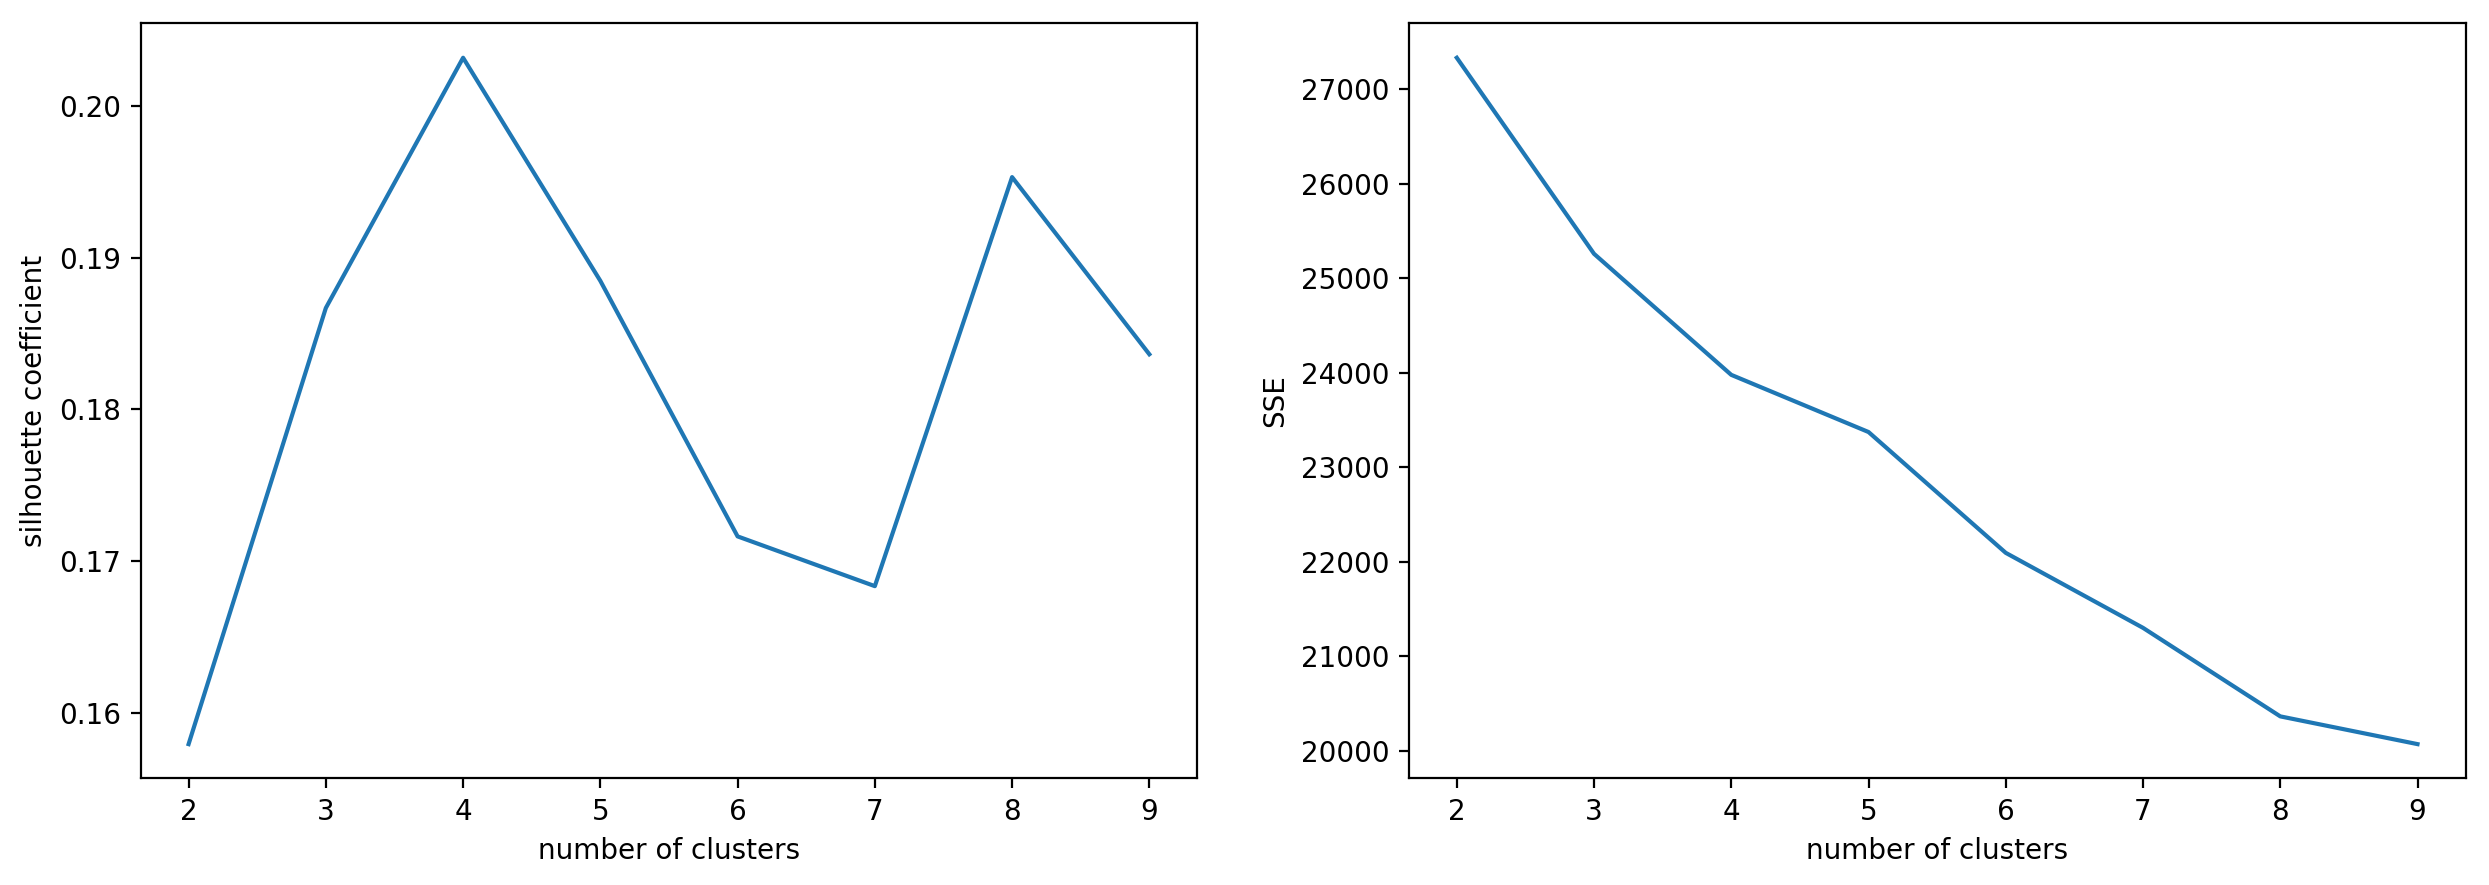

In [422]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,10)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');
plt.show()

In [133]:
km=KMeans(n_clusters=4)
km.fit_transform(messed_np_vecs)

array([[ 2.01730454,  2.85571037,  2.65099145,  1.66213126],
       [ 2.01730454,  2.85571037,  2.65099145,  1.66213126],
       [ 2.59788015,  3.53407345,  3.06777632,  2.02211783],
       ..., 
       [ 1.60316555,  2.61593007,  2.25136316,  1.32735652],
       [ 1.13307309,  2.67618356,  2.43173757,  1.80420689],
       [ 1.78800098,  3.09911398,  2.49043778,  1.78171835]])

In [139]:
messed['gender'].value_counts()

female    74595
male      54709
Name: gender, dtype: int64

In [408]:
messed.shape

(129304, 15)

In [442]:
# with open('km.pkl','wb') as file:
#     pickle.dump(km,file)
    
# with open('messed_np_vecs.pkl','wb') as file:
#     pickle.dump(messed_np_vecs,file)
    
# with open('messed','wb') as file:
#     pickle.dump(messed,file)

# with open('sampled.pkl','wb') as file:
#     pickle.dump(sampled,file)

In [4]:
# with open('km.pkl','rb') as file:
#     km = pickle.load(file)
    
# with open('messed_np_vecs.pkl','rb') as file:
#     messed_np_vecs = pickle.load(file)
    
# with open('messed','rb') as file:
#     messed = pickle.load(file)

# with open('sampled.pkl','rb') as file:
#     sampled = pickle.load(file)

In [159]:
messed['pagename'].value_counts()

Memes                                           82432
JokeBot                                          7535
NTD Television                                   4727
NTD Television Australia                         3693
NTD Television India                             3646
Christian Grey Bot                               2914
NTD Life                                         2789
Viral Thread                                     1746
La Gran Epoca                                    1610
Vodafone IS                                      1506
Epoch Times Paris                                1132
Syria Charity                                    1081
NTD Inspired Life                                 905
Radio today 89.6fm                                902
The Epoch Times                                   837
Jalals                                            703
Bien Inspirant                                    582
Culture Trip                                      536
Bob                         

In [143]:
messed[km.predict(messed_np_vecs) == 0]['gender'].value_counts()

male      3743
female    2336
Name: gender, dtype: int64

## TSNE

In [97]:
X_embedded=TSNE(n_components=2, perplexity=50).fit_transform(sampled.values)

In [98]:
X_embedded.shape

(8000, 2)

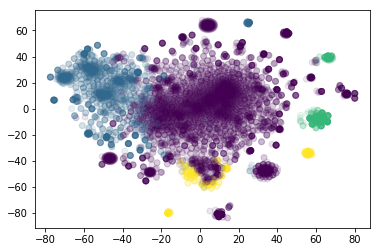

In [99]:
x=X_embedded[:,0]
y=X_embedded[:,1]
import matplotlib.pyplot as plt
plt.scatter(x,y,c=20*km.fit_predict(sampled.values),alpha=.1)
plt.show()

In [457]:
from collections import Counter
c=Counter(km.labels_)
c

Counter({0: 1527, 1: 451, 2: 1071, 3: 4951})

## ANALYSIS OF USAGE

In [5]:
# number of messages in each cluster
len(messed[km.predict(messed_np_vecs) == 0]),len(messed[km.predict(messed_np_vecs) == 1]),len(messed[km.predict(messed_np_vecs) == 2]),len(messed[km.predict(messed_np_vecs) == 3])

(6079, 86367, 29149, 7709)

In [6]:
messed[km.predict(messed_np_vecs) == 0]

,datemess,messages,rp_page,su_follow,botActive,botCreated,datepage,fans,pagename,firstContactDate,lastContactDate,gender,timezone,locale,vecs
49,2018-07-22 00:41:31.356,puns,1748596732049183,1465645643512798,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-10-12T04:56:26.399Z,2017-10-19T08:45:38.569Z,male,-4.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
413,2018-07-26 11:53:42.255,puns,1748596732049183,1638895042828465,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-07-31T13:41:34.361Z,2017-08-11T22:29:17.536Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
619,2018-07-26 12:08:57.509,puns,1748596732049183,1653545971362218,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-10-06T10:11:05.062Z,2017-10-15T23:39:29.334Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
620,2018-07-26 13:24:19.552,puns,1748596732049183,1653545971362218,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-10-06T10:11:05.062Z,2017-10-15T23:39:29.334Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
623,2018-07-26 12:08:57.508,puns,1748596732049183,1653545971362218,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-10-06T10:11:05.062Z,2017-10-15T23:39:29.334Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
624,2018-07-26 13:24:19.550,puns,1748596732049183,1653545971362218,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-10-06T10:11:05.062Z,2017-10-15T23:39:29.334Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
675,2018-07-26 12:48:59.364,puns,1748596732049183,1544604878958397,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-11-10T22:42:01.471Z,2017-11-13T09:28:49.972Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
680,2018-07-26 12:48:59.362,puns,1748596732049183,1544604878958397,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-11-10T22:42:01.471Z,2017-11-13T09:28:49.972Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
756,2018-07-26 13:12:22.425,puns,1748596732049183,1655837987823907,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-10-16T03:43:34.233Z,2017-10-16T03:50:18.371Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."
761,2018-07-26 13:12:22.424,puns,1748596732049183,1655837987823907,False,True,2017-07-19 13:33:14.479,1349,JokeBot,2017-10-16T03:43:34.233Z,2017-10-16T03:50:18.371Z,male,8.00,en_US,"[0.181641, 0.0634766, -0.0576172, 0.240234, -0..."


In [7]:
follow_count = []
for su_follow, group in messed.groupby('su_follow'):
    follow_count.append([su_follow,len(group)])
    
follow_count = pd.DataFrame(follow_count,columns=['su_follow','count'])

Count - how many times a given user messaged the bot (grouped by each message).

In [8]:
follow_count.head()

,su_follow,count
0,1000352066734721,7
1,1000608230064222,1
2,1002285659896094,2
3,1002785683179362,1
4,1003108569814067,2


In [9]:
messed_foll = pd.merge(messed,follow_count,on='su_follow')

In [10]:
messed_foll.gender.value_counts()

female    74595
male      54709
Name: gender, dtype: int64

Count - how many times a given user messaged

In [11]:
masked1 = messed_foll[km.predict(messed_np_vecs) == 0].sort_values(by=['count'], ascending=False)
masked2 = messed_foll[km.predict(messed_np_vecs) == 1].sort_values(by=['count'], ascending=False)
masked3 = messed_foll[km.predict(messed_np_vecs) == 2].sort_values(by=['count'], ascending=False)
masked4 = messed_foll[km.predict(messed_np_vecs) == 3].sort_values(by=['count'], ascending=False)

In [12]:
masked1

,datemess,messages,rp_page,su_follow,botActive,botCreated,datepage,fans,pagename,firstContactDate,lastContactDate,gender,timezone,locale,vecs,count
54754,2018-08-02 16:08:12.920,memes for assshole,527507080600217,2158836630856219,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-01T13:10:45.537Z,2018-08-02T16:08:13.825Z,male,9.0,en_US,"[0.216766, -0.0625, 0.0877686, 0.293457, -0.23...",82
54713,2018-08-02 16:08:12.922,memes for assshole,527507080600217,2158836630856219,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-01T13:10:45.537Z,2018-08-02T16:08:13.825Z,male,9.0,en_US,"[0.216766, -0.0625, 0.0877686, 0.293457, -0.23...",82
70739,2018-08-19 16:05:29.911,memes,527507080600217,1789889221080162,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-15T12:44:15.354Z,2018-08-15T12:45:11.412Z,female,8.0,en_US,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",57
68704,2018-08-15 13:24:27.457,hay nako memes,527507080600217,1604596102951950,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-04-09T05:37:35.089Z,2018-08-15T13:44:53.031Z,female,8.0,en_US,"[0.239339, 0.0500488, -0.00520833, 0.215169, -...",45
48745,2018-07-30 00:46:07.522,the memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.262695, 0.0136719, 0.090332, 0.288452, -0.2...",36
48763,2018-07-30 00:46:07.520,the memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.262695, 0.0136719, 0.090332, 0.288452, -0.2...",36
48762,2018-07-30 00:46:05.888,memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",36
48753,2018-07-30 00:45:24.476,hungry for memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.159159, 0.0755208, -0.009847, 0.255208, -0....",36
48747,2018-07-30 00:40:53.383,memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",36
48742,2018-07-30 00:46:05.889,memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",36


### CLUSTER 1 - Meme Requests

In [13]:
4097/129304

0.03168502134504733

In [13]:
tried = masked1.set_index(['datemess'])

In [14]:
tried['m'] = 1

In [15]:
tried.head()

,messages,rp_page,su_follow,botActive,botCreated,datepage,fans,pagename,firstContactDate,lastContactDate,gender,timezone,locale,vecs,count,m
datemess,,,,,,,,,,,,,,,,
2018-08-02 16:08:12.920,memes for assshole,527507080600217,2158836630856219,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-01T13:10:45.537Z,2018-08-02T16:08:13.825Z,male,9.0,en_US,"[0.216766, -0.0625, 0.0877686, 0.293457, -0.23...",82,1
2018-08-02 16:08:12.922,memes for assshole,527507080600217,2158836630856219,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-01T13:10:45.537Z,2018-08-02T16:08:13.825Z,male,9.0,en_US,"[0.216766, -0.0625, 0.0877686, 0.293457, -0.23...",82,1
2018-08-19 16:05:29.911,memes,527507080600217,1789889221080162,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-15T12:44:15.354Z,2018-08-15T12:45:11.412Z,female,8.0,en_US,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",57,1
2018-08-15 13:24:27.457,hay nako memes,527507080600217,1604596102951950,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-04-09T05:37:35.089Z,2018-08-15T13:44:53.031Z,female,8.0,en_US,"[0.239339, 0.0500488, -0.00520833, 0.215169, -...",45,1
2018-07-30 00:46:07.522,the memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.262695, 0.0136719, 0.090332, 0.288452, -0.2...",36,1


In [16]:
# number of messages per week
tried.m.resample('W').sum()

datemess
2018-06-24     388
2018-07-01     470
2018-07-08     377
2018-07-15     394
2018-07-22     654
2018-07-29    1345
2018-08-05    1491
2018-08-12     593
2018-08-19     367
Freq: W-SUN, Name: m, dtype: int64

In [17]:
masked1['messages'].sample(50).unique()

array(['bot', 'send a meme', 'seasons memes', 'another meme', 'send memes',
       'memes', 'pasa memes', 'yes!another meme', 'meme that',
       'memes in spanish', 'give meme', 'i like memes', 'mándame memes',
       'bad memes', 'puns', 'memes plz', 'show some memes', 'get a meme 😎',
       'meme', 'memes chistosos', 'political meme pls', 'porn meme',
       'new meme', 'pengeng memes paps', 'bts memes', 'see some memes',
       'friend memes', 'yes! another meme', 'hey memes', 'manden memes',
       'girl meme', 'sexy meme', 'emo', 'drake meme'], dtype=object)

In [18]:
masked1['count'].unique() #how many times user replied to chatbot

array([82, 57, 45, 36, 32, 28, 25, 24, 21, 20, 19, 18, 16, 15, 14, 13, 12,
       11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [19]:
masked1[masked1['count'] > 1]

,datemess,messages,rp_page,su_follow,botActive,botCreated,datepage,fans,pagename,firstContactDate,lastContactDate,gender,timezone,locale,vecs,count
54754,2018-08-02 16:08:12.920,memes for assshole,527507080600217,2158836630856219,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-01T13:10:45.537Z,2018-08-02T16:08:13.825Z,male,9.0,en_US,"[0.216766, -0.0625, 0.0877686, 0.293457, -0.23...",82
54713,2018-08-02 16:08:12.922,memes for assshole,527507080600217,2158836630856219,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-01T13:10:45.537Z,2018-08-02T16:08:13.825Z,male,9.0,en_US,"[0.216766, -0.0625, 0.0877686, 0.293457, -0.23...",82
70739,2018-08-19 16:05:29.911,memes,527507080600217,1789889221080162,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-08-15T12:44:15.354Z,2018-08-15T12:45:11.412Z,female,8.0,en_US,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",57
68704,2018-08-15 13:24:27.457,hay nako memes,527507080600217,1604596102951950,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-04-09T05:37:35.089Z,2018-08-15T13:44:53.031Z,female,8.0,en_US,"[0.239339, 0.0500488, -0.00520833, 0.215169, -...",45
48745,2018-07-30 00:46:07.522,the memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.262695, 0.0136719, 0.090332, 0.288452, -0.2...",36
48763,2018-07-30 00:46:07.520,the memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.262695, 0.0136719, 0.090332, 0.288452, -0.2...",36
48762,2018-07-30 00:46:05.888,memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",36
48753,2018-07-30 00:45:24.476,hungry for memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.159159, 0.0755208, -0.009847, 0.255208, -0....",36
48747,2018-07-30 00:40:53.383,memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",36
48742,2018-07-30 00:46:05.889,memes,527507080600217,1864760460248099,True,True,2017-08-11 19:53:37.439,13901217,Memes,2018-07-30T00:35:03.389Z,2018-07-30T00:46:07.545Z,female,1.0,en_GB,"[0.445312, -0.0776367, 0.130859, 0.523438, -0....",36


In [20]:
masked1[masked1['count'] > 1]['pagename'].value_counts()

Memes                 4011
JokeBot                 81
Christian Grey Bot       3
NTD Television           2
Name: pagename, dtype: int64

In [21]:
masked1[masked1['count'] > 1]['gender'].value_counts()

male      2519
female    1578
Name: gender, dtype: int64

In [22]:
masked1[masked1['count'] > 1]['timezone'].value_counts()

 8.00     1146
-5.00      589
-4.00      320
 2.00      291
 5.00      233
 6.00      218
 5.50      214
-7.00      192
 0.00      192
 1.00      187
-6.00      131
 5.75       54
-3.00       50
 7.00       47
 10.00      46
 3.00       34
 9.00       27
 12.00      12
 4.00       11
 9.50       10
-8.00        8
 8.50        7
 3.50        6
 11.00       6
-9.75        6
 8.25        5
 1.50        4
 7.75        4
-11.00       3
 11.50       3
 6.75        3
 6.50        3
-6.50        3
-5.75        2
-9.50        2
-10.50       2
-4.25        2
 5.25        2
 6.25        2
-12.00       2
 4.50        2
-1.50        2
 2.50        2
 2.25        2
-2.50        2
-2.00        2
-7.50        2
 7.50        1
-6.75        1
 0.50        1
-3.25        1
Name: timezone, dtype: int64

In [23]:
masked1[masked1['count'] > 1]['locale'].value_counts()

en_US    2701
en_GB     678
es_LA     360
es_ES     118
pl_PL      37
id_ID      37
pt_BR      35
tl_PH      21
fr_FR      15
ar_AR      10
ro_RO      10
cs_CZ       7
nl_NL       6
el_GR       6
da_DK       6
de_DE       5
sv_SE       5
sq_AL       5
ur_PK       4
fr_CA       4
sr_RS       4
tr_TR       3
bn_IN       3
ka_GE       2
bs_BA       2
es_MX       2
sw_KE       2
hi_IN       2
hu_HU       2
mk_MK       1
ja_JP       1
my_MM       1
vi_VN       1
et_EE       1
Name: locale, dtype: int64

### CLUSTER 2 - Conversation

In [24]:
tried2 = masked2.set_index(['datemess'])

In [25]:
tried2['m'] = 1

In [27]:
# number of messages a week
tried2.m.resample('W').sum()

datemess
2018-06-24     9497
2018-07-01    14597
2018-07-08     8680
2018-07-15     8172
2018-07-22     8266
2018-07-29    14379
2018-08-05    13367
2018-08-12     5522
2018-08-19     3887
Freq: W-SUN, Name: m, dtype: int64

In [26]:
masked2['messages'].sample(n=10).unique()

array(['ok', 'ways to save',
       'i ve just finished my donation for my birthday in facebook',
       'more jokes', 'okay', 'baby i ve ben iven been losing',
       'no but sometimes u punish very bar', 'noooo',
       'hi! i just saw a movie with a sun painting. thats awesome what nature give us. i paint an artworks with pigment directly from fruits and vegetables and some parts of them.'], dtype=object)

In [170]:
masked2['count'].unique()

array([31319,   342,   312,   265,   210,   155,   133,    86,    84,
          83,    82,    69,    68,    66,    63,    61,    58,    55,
          54,    52,    51,    49,    45,    43,    41,    40,    38,
          37,    36,    35,    34,    33,    32,    31,    30,    29,
          28,    27,    26,    25,    24,    23,    22,    21,    20,
          19,    18,    17,    16,    15,    14,    13,    12,    11,
          10,     9,     8,     7,     6,     5,     4,     3,     2,     1])

In [86]:
masked2[masked2['pagename'] == 'Memes']['messages']

35083                          bcuz u do things like these
26058                     now u don’t have anything to say
26071               ur the one who is defending ur friends
26070                            m not defending them. idc
26069                                               oh wow
26068                                   defending assholes
26067                         palak touched y totally fine
26066    im talking about her bejhaviourwith me n ur fr...
26065                                         totally fine
26064               siya does stuff to me. completely fine
26063                                    first answer this
26062    who cried at the thought of “what if i treated...
26061    u want to become thats u still want to be frnd...
26060                 who used to call ashna randi and all
26059                            ur tho ok with everything
26057       ha go becomel ike them become a perv like them
26073    imn ot frnds withh siya anymore after what hap.

In [31]:
masked2[masked2['count'] > 1]['pagename'].value_counts()

Memes                                                            46582
JokeBot                                                           4879
NTD Television                                                    1962
Christian Grey Bot                                                1663
NTD Life                                                          1457
NTD Television Australia                                          1426
NTD Television India                                              1215
Viral Thread                                                       950
NTD Inspired Life                                                  584
Bob                                                                441
The Epoch Times                                                    412
Vodafone IS                                                        363
Todays Fun Deals                                                   344
BottBott                                                           309
Radio 

In [32]:
masked2[masked2['count'] > 1]['gender'].value_counts()

female    43540
male      24310
Name: gender, dtype: int64

In [33]:
masked2[masked2['count'] > 1]['timezone'].value_counts()

 5.50     29437
 8.00      9799
-5.00      3745
-4.00      3663
 2.00      3053
 0.00      2787
 5.00      2494
-7.00      2240
 1.00      2110
 6.00      2053
-6.00      1346
 10.00     1182
 3.00       964
 7.00       529
-3.00       322
 9.00       238
 4.00       226
 5.75       223
-8.00       218
 11.00      187
 9.50       113
 12.00       89
 8.25        74
-10.00       58
 4.50        47
 6.50        38
 7.75        34
-1.00        33
-2.50        31
 8.50        29
          ...  
 10.25        6
 3.25         6
 4.75         5
-11.50        5
 3.50         5
 4.25         5
-7.50         4
-1.25         4
 11.50        4
-10.50        4
 1.25         3
 9.75         3
-5.75         3
-9.50         3
-8.50         3
 5.25         3
 3.75         3
-0.50         2
 14.00        2
-2.25         2
-1.50         2
 13.25        2
-9.25         2
-7.75         2
 0.25         2
-2.75         2
 1.50         1
 0.75         1
-10.75        1
-0.75         1
Name: timezone, Length: 

In [34]:
masked2[masked2['count'] > 1]['locale'].value_counts()

en_GB    33489
en_US    28603
es_LA     1648
pl_PL      591
fr_FR      452
es_ES      409
ar_AR      290
id_ID      224
pt_BR      198
tl_PH      155
nl_NL      101
hi_IN       98
bn_IN       97
el_GR       96
is_IS       87
ur_PK       78
ro_RO       77
ru_RU       74
zh_TW       70
hu_HU       66
fr_CA       65
nb_NO       60
de_DE       58
sv_SE       53
it_IT       51
cs_CZ       47
da_DK       42
th_TH       39
vi_VN       38
pt_PT       37
         ...  
sr_RS       17
my_MM       17
mk_MK       16
mr_IN       14
cx_PH       14
fi_FI       13
lt_LT       13
kn_IN       10
bg_BG       10
bs_BA       10
fa_IR        9
sq_AL        8
gu_IN        8
sw_KE        8
ja_JP        8
nl_BE        8
ml_IN        8
ne_NP        7
en_IN        6
mn_MN        6
as_IN        5
te_IN        5
af_ZA        4
ms_MY        4
sk_SK        4
pa_IN        3
he_IL        3
so_SO        2
et_EE        2
ha_NG        2
Name: locale, Length: 69, dtype: int64

### CLUSTER 3 - Foreign Languages

In [72]:
29149/129304

0.2254299944317268

In [36]:
tried3 = masked3.set_index(['datemess'])

In [37]:
tried3['m'] = 1

In [38]:
# number of messages a week
tried3.m.resample('W').sum()

datemess
2018-06-24    2467
2018-07-01    3947
2018-07-08    2832
2018-07-15    2602
2018-07-22    2701
2018-07-29    5159
2018-08-05    5458
2018-08-12    2124
2018-08-19    1859
Freq: W-SUN, Name: m, dtype: int64

In [27]:
masked3['messages'].sample(n=10).unique()

array(['hola', 'boa noite tudo bem com vocês chistian g',
       'kong may pera ka dyan bili ka suka ung nasa bote na at tuyo\ntnx',
       "je souhaite que ce petit qui s'ouvre dans notre monde (?) soit heureux, bien soigné, bien dirigé dans sa jeunesse etc.... suis très attendrie de le regarder. plein de bonne choses petit bout de chou.",
       '🏠 fara til baka', 'bey', 'okey', 'español', 'ola',
       'salam aleykoum est ce que vous faite se soir la prier de l’éclipse ?'], dtype=object)

In [65]:
masked3['count'].unique()

array([31319,   342,   312,   265,   210,   155,   133,    86,    84,
          83,    82,    69,    68,    66,    63,    61,    57,    55,
          54,    53,    52,    51,    49,    45,    43,    40,    38,
          36,    35,    34,    33,    32,    31,    30,    29,    28,
          27,    26,    25,    24,    23,    22,    21,    20,    19,
          18,    17,    16,    15,    14,    13,    12,    11,    10,
           9,     8,     7,     6,     5,     4,     3,     2,     1])

In [68]:
masked3['pagename'].value_counts()

Memes                                                  17044
La Gran Epoca                                           1474
Vodafone IS                                             1131
Epoch Times Paris                                       1091
Syria Charity                                            812
NTD Television                                           805
NTD Television India                                     647
JokeBot                                                  560
Bien Inspirant                                           551
Christian Grey Bot                                       432
NTD Life                                                 423
NTD Television Australia                                 401
Radio today 89.6fm                                       287
Esencia del Conocimiento - lagranepoca.com               280
Epoch Times Nordic                                       269
Gung Ho Danmark                                          207
Gung Ho Ísland          

In [42]:
masked3[masked3['count'] > 1]['gender'].value_counts()

female    13889
male       8961
Name: gender, dtype: int64

In [69]:
masked3['locale'].value_counts()

en_US    7994
en_GB    7990
es_LA    5097
fr_FR    2749
es_ES    1392
is_IS     769
pt_BR     538
pl_PL     330
de_DE     280
id_ID     280
sv_SE     272
da_DK     228
it_IT     191
ar_AR     100
ro_RO      98
hi_IN      97
pt_PT      69
fr_CA      66
bn_IN      59
tl_PH      53
tr_TR      39
es_MX      35
ru_RU      34
nl_NL      33
vi_VN      27
ur_PK      27
cs_CZ      25
el_GR      22
zh_TW      22
hu_HU      20
         ... 
bg_BG       7
lt_LT       7
ka_GE       7
mk_MK       6
hr_HR       6
cx_PH       6
ms_MY       6
sl_SI       5
fi_FI       5
nl_BE       5
fa_IR       4
sk_SK       4
ne_NP       3
ml_IN       3
he_IL       3
kn_IN       3
ta_IN       3
sq_AL       2
rw_RW       2
uk_UA       2
bs_BA       2
af_ZA       2
ps_AF       1
or_IN       1
sw_KE       1
tz_MA       1
en_PI       1
as_IN       1
fo_FO       1
en_IN       1
Name: locale, Length: 69, dtype: int64

In [44]:
masked3[masked3['count'] > 1]['locale'].value_counts()

en_GB    7315
en_US    6175
es_LA    3485
fr_FR    2094
es_ES     962
is_IS     723
pt_BR     360
pl_PL     239
sv_SE     191
de_DE     178
id_ID     170
da_DK     166
it_IT     134
ar_AR      70
ro_RO      70
hi_IN      52
pt_PT      47
fr_CA      39
bn_IN      38
tl_PH      37
es_MX      27
nl_NL      24
cs_CZ      21
el_GR      20
ru_RU      20
ur_PK      19
tr_TR      18
vi_VN      16
nb_NO      14
hu_HU      13
sr_RS      11
th_TH      10
gu_IN       8
zh_CN       7
ko_KR       6
zh_TW       6
cx_PH       6
pa_IN       5
mr_IN       5
ka_GE       5
fa_IR       4
te_IN       4
nl_BE       4
mk_MK       4
lt_LT       4
he_IL       3
ne_NP       3
ml_IN       3
fi_FI       3
ms_MY       2
rw_RW       2
sl_SI       2
ta_IN       1
bg_BG       1
sq_AL       1
en_PI       1
sw_KE       1
kn_IN       1
Name: locale, dtype: int64

### CLUSTER 4 - Greetings

In [45]:
tried4 = masked4.set_index(['datemess'])

In [46]:
tried4['m'] = 1

In [47]:
# number of messages a week
tried4.m.resample('W').sum()

datemess
2018-06-24     574
2018-07-01     741
2018-07-08     539
2018-07-15     507
2018-07-22     814
2018-07-29    1759
2018-08-05    1751
2018-08-12     594
2018-08-19     430
Freq: W-SUN, Name: m, dtype: int64

In [74]:
7709/129304

0.05961919198168657

In [80]:
masked4['messages'].sample(n=7709).unique()

array(['hi', 'hello', 'hello ji', 'hi bitch', 'hi tisha apu', 'hi guys',
       'hello sir', 'hello cutie', 'hi babe',
       'hi sweetheart ❤️❤️❤️😍😍😍😍😍❤️💍💍', 'hi barbie! hahaha', 'hi baby',
       'goodnight', 'hi helo', 'hi ?', 'hi gm❤️❤️❤️❤️', 'hello ooooo',
       'hi bro', 'hi ki koren', 'hi ntd tv', 'hello mr grey', 'hi !',
       'hi mam', 'hi jalal', 'hello jacob! peek-a-boo!', 'hi ❤',
       'hi friends', 'hi kua', 'hi ntd', 'wesy chuss hi tha', 'hi hottie',
       'hi cyyyyy', 'hi christian💜', 'hello :v', 'hi christian',
       'hi baiya kamon asan,,ami  nurnobi,,chittagong',
       'hello hello hello hello hello hello hello hello hello hello hello hello hello hello hello hello hello',
       'hi viya ki kobor', 'hello 👋', 'hi pren', 'hi bava', 'hi handsome',
       'hi bro.', 'hello ntd australia.', 'hi bot', 'hi hloo g. n',
       'hi there,', 'hi love', 'hi sir', 'hello :)', 'hi mr. grey',
       'hi memeess😁', 'hello fdp', 'hi admin', 'hello friends',
       'hello amdin'

In [75]:
masked4['count'].unique()

array([31319,   312,   155,    84,    61,    52,    49,    45,    41,
          35,    34,    32,    31,    28,    26,    24,    23,    22,
          21,    20,    19,    18,    17,    16,    15,    14,    13,
          12,    11,    10,     9,     8,     7,     6,     5,     4,
           3,     2,     1])

In [82]:
masked4['pagename'].unique()

array(['Memes', 'Todays Fun Deals', 'The Pizza Bot', 'Radio today 89.6fm',
       'Sahara', 'Falun Gong in Melbourne & Victoria', 'JokeBot',
       'The Epoch Times', 'Bob', 'NTD Television Canada',
       'Christian Grey Bot', 'Vodafone IS', 'NTD Life', 'Edge of Wonder',
       'Golden A Entertainment', 'Brother Australia',
       'Jadabpur B.M High School And College, Dhamrai, Dhaka',
       'NTD Inspired Life', 'Airbnb Bot', 'NTD Television',
       'Donald Trump Bot', 'NTD Television Australia', 'Alltime 10s',
       'Startup Grind', 'Global Cinemas', 'Culture Trip', 'Logan Bot',
       'RBT', 'Viral Thread', '14AGAIN', 'Jalals', 'Beauty Within',
       'Make It Easy', 'Syria Charity', 'NTD Television India',
       'Ownage Pranks', 'Mexican Vines', 'La Gran Epoca', 'Epoch Genial',
       '大紀元 epochtimes.com', 'JEANS SAMY', 'The News Express', 'Prime.ai',
       'Barzone Hours', 'Trending World', 'The Epoch Times Canada',
       'Kristian agabon', 'Epoch Asia', 'NTD Television Kore

In [70]:
masked4['messages'].value_counts()

hi                                       5636
hello                                    1699
hi christian                               24
hello sir                                  13
hi admin                                   12
hi bro                                      7
hello mr grey                               7
goodbye                                     7
hi mama                                     7
hi baby                                     6
hello 👋                                     5
hi friends                                  5
hello cutie                                 5
hello bro                                   4
hi guys                                     4
oh hi                                       4
goodnight                                   4
hi mr grey                                  4
hello dear                                  4
hi babe                                     4
hi love                                     4
hello friends                     

In [50]:
masked4[masked4['count'] > 1]['pagename'].value_counts()

Memes                                         3308
Christian Grey Bot                             501
Radio today 89.6fm                             185
NTD Television                                 130
JokeBot                                        128
NTD Television India                           125
NTD Television Australia                       104
NTD Life                                        74
Jalals                                          71
NTD Television Canada                           48
NTD Inspired Life                               47
Viral Thread                                    28
Culture Trip                                    23
The Pizza Bot                                   23
Make It Easy                                    22
The News Express                                18
Trending World                                  16
Blunt Kommunity                                 15
Ownage Pranks                                   15
La Gran Epoca                  

In [51]:
masked4[masked4['count'] > 1]['gender'].value_counts()

male      3101
female    2085
Name: gender, dtype: int64

In [52]:
masked4[masked4['count'] > 1]['timezone'].value_counts()

 8.00     966
 6.00     731
 5.50     680
 0.00     567
 5.00     479
 2.00     267
-5.00     244
 1.00     233
-7.00     213
-4.00     189
 3.00     118
 7.00      77
-6.00      71
 10.00     58
-3.00      42
 5.75      35
 4.00      31
-8.00      20
 11.00     18
 4.50      17
 12.00     17
 9.00      12
-9.00      11
 6.50      10
-6.50      10
 7.75       6
 9.50       5
 13.00      4
-8.50       4
 8.25       4
 8.50       4
-2.50       4
 3.50       3
-12.00      3
-3.75       2
-2.00       2
 0.50       2
-2.75       2
-7.75       2
-0.25       2
 6.75       2
 10.25      2
-5.75       2
-3.25       2
-8.25       2
 10.50      1
 7.25       1
-4.50       1
-6.25       1
-9.50       1
 4.25       1
 9.75       1
-11.00      1
 11.75      1
-10.00      1
-1.00       1
Name: timezone, dtype: int64

In [53]:
masked4[masked4['count'] > 1]['locale'].value_counts()

en_US    3145
en_GB    1320
es_LA     145
bn_IN      85
pl_PL      84
fr_FR      43
ar_AR      43
es_ES      38
pt_BR      30
tl_PH      29
ur_PK      29
id_ID      27
th_TH      22
hi_IN      12
ro_RO      12
el_GR      11
hu_HU       8
zh_TW       8
ru_RU       8
ka_GE       7
vi_VN       7
as_IN       7
sq_AL       6
cs_CZ       6
it_IT       4
de_DE       4
nl_BE       3
mn_MN       3
pt_PT       3
zh_CN       3
my_MM       3
mk_MK       3
nb_NO       3
ha_NG       2
fa_IR       2
qz_MM       2
da_DK       2
ps_AF       2
mr_IN       2
kn_IN       1
tr_TR       1
bs_BA       1
nl_NL       1
ja_JP       1
fr_CA       1
sv_SE       1
te_IN       1
ms_MY       1
et_EE       1
sk_SK       1
af_ZA       1
fi_FI       1
Name: locale, dtype: int64

## TOPIC ANALYSIS (CLUSTER 2 CONVERSATIONS)

In [147]:
len(messed[km.predict(messed_np_vecs) == 1])

86367

In [148]:
messed_np_vecs[km.predict(messed_np_vecs) == 1]

array([[ 0.11572266, -0.12988281,  0.06591797, ..., -0.19238281,
         0.07714844, -0.05883789],
       [ 0.11572266, -0.12988281,  0.06591797, ..., -0.19238281,
         0.07714844, -0.05883789],
       [ 0.08251953, -0.15136719,  0.06591797, ..., -0.1015625 ,
        -0.10839844, -0.20507812],
       ..., 
       [ 0.03529217, -0.00352262,  0.00058445, ..., -0.01425582,
         0.04950202, -0.01889841],
       [ 0.11354981,  0.06821289,  0.11933593, ..., -0.14775391,
        -0.22990723,  0.00214844],
       [ 0.08862305,  0.13061523,  0.07299805, ..., -0.10510254,
         0.00189209,  0.10620117]])

In [149]:
messed[km.predict(messed_np_vecs) == 1][messed['messages']!='no']['messages']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0                                                       yes
1                                                       yes
3                                                 more puns
4                                        give me more puns!
5                                            funny t-shirts
7                                                 more puns
8                                        give me more puns!
9                                            funny t-shirts
12                                                      yes
13                                       more pick up lines
14                                                      yes
15                                       more pick up lines
18                                               more jokes
20                                               more jokes
23                                                      sap
24                                     i dont need ur jokes
25                                      

In [156]:
mask = messed[km.predict(messed_np_vecs) == 1]

### LSA w/ Google

In [165]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [166]:
from sklearn.decomposition import TruncatedSVD

n_comp = 4
lsa = TruncatedSVD(n_components=n_comp)

lsa.fit_transform(messed_np_vecs[km.predict(messed_np_vecs) == 3])

array([[  1.98470236e+00,  -3.07500220e-01,   5.27398747e-01,
          9.88827570e-03],
       [  1.98470236e+00,  -3.07500220e-01,   5.27398747e-01,
          9.88827570e-03],
       [  2.96510761e+00,  -5.52443329e-01,  -1.28098606e-02,
         -9.26980382e-06],
       ..., 
       [  2.96510761e+00,  -5.52443329e-01,  -1.28098606e-02,
         -9.26980381e-06],
       [  2.58411052e+00,   2.05800541e+00,  -1.60839854e-02,
         -1.06284185e-02],
       [  2.96510761e+00,  -5.52443329e-01,  -1.28098606e-02,
         -9.26980381e-06]])

In [167]:
joined_vec_1 = messed_google_data[(messed_google_data['messages'] != "More Jokes") 
                                  & (messed_google_data['messages'] != "More jokes")
                                 & (messed_google_data['messages'] != "Pickup lines")
                                 & (messed_google_data['messages'] != "More pick up lines")
                                 & (messed_google_data['messages'] != "Give me more puns!")
                                 & (messed_google_data['messages'] != "Joke")
                                 & (messed_google_data['messages'] != "Funny T-Shirts")
                                 & (messed_google_data['messages'] != "More Puns")
                                 & (messed_google_data['messages'] != "Funny T-shirts")
                                 & (messed_google_data['messages'] != "Jokes")
                                 & (messed_google_data['messages'] != "more jokes")
                                 & (messed_google_data['messages'] != "funny t-shirts")]

joined_vec_1f = joined_vec_1.drop(columns=['messages'])
joined_vec_1m = joined_vec_1[['messages']]

In [168]:
joined_vec_1m.messages.values

array(['yes', 'yes', 'no', ..., "pls what's your name on instagram",
       'hola oye puede suvir este video on su pagina  ?',
       'expectiva vs. realidad'], dtype=object)

In [169]:
display_topics(lsa, joined_vec_1m.messages.values,10)


Topic  0
no, my beauty is timeless, do you understand me?, ambot nimo, hi, greys anatomy, joke, gwapa kaayo ko, broken thoughts, shut up...

Topic  1
jokes, yes, hindi ko sya basta lang mahal, mahal na mahal ko kasi siya., lol, edi wow, idiot, greys anatomy, bawal ako makipagusap sayo magagalit mahal ko, yeah, what you said

Topic  2
hi yow, joke, idont love him, baby i ve ben iven been losing, k, yes, give me more puns!, are you joker ?, hugot lines, sleeps

Topic  3
pakyu ka, ha, play now, i don't nunderstand what you said, i don't have load., the highest chief among the patoatoes is call potato chief, up your pickup game, so so so much, pickup lines, ulo mo


#### It was difficult to find results in the conversations in Cluster 2. Next steps: cluster / conduct topic analysis by conversations on *1 page*.